# 参数

In [1]:
TRAIN_SIZE = 5000
VAL_SIZE = 1000

# 导入mnist数据集

In [2]:
# 导入mnist
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
# 拆分训练集和测试集
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 查看训练数据

In [4]:
# 查看数据类型
type(train_images)

numpy.ndarray

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# 查看测试数据

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# 作图查看mnist

In [9]:
import numpy as np
import matplotlib.pyplot as plt
digits = np.concatenate(train_images[:10], axis=1) 
plt.imshow(digits)
plt.show()

<Figure size 640x480 with 1 Axes>

# 从训练集中提取出验证集

In [10]:
val_images, val_labels = train_images[:VAL_SIZE], train_labels[:VAL_SIZE]
new_train_images, new_train_labels = train_images[-TRAIN_SIZE:], train_labels[-TRAIN_SIZE:]
new_train_images.shape

(50000, 28, 28)

# 输入输出转成向量

In [11]:
#  输入的28*28图像转成向量
train_vectors = new_train_images.reshape((TRAIN_SIZE, 28 * 28))
test_vectors = test_images.reshape((10000, 28 * 28))
val_vectors = val_images.reshape((VAL_SIZE, 28 * 28))

# 检查训练集输入
train_vectors.shape

(50000, 784)

In [12]:
from keras.utils import to_categorical

# 将labels转为one-hot向量
train_one_hots = to_categorical(new_train_labels)
test_one_hots = to_categorical(test_labels)
val_one_hots = to_categorical(val_labels)

# 检查训练集输出
train_one_hots.shape

(50000, 10)

# 归一化

In [28]:
print('归一化前：', train_vectors[0][110:150])
print()

train_vectors_norm = train_vectors.astype('float32') / 255
test_vectors_norm = test_vectors.astype('float32') / 255
val_vectors_norm = val_vectors.astype('float32') / 255

print('归一化后：', train_vectors_norm[0][110:150])

归一化前： [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 29]

归一化后： [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.11372549]


# 搭建网络

In [36]:
# 导入
from keras import models
from keras import layers
from keras import regularizers
from keras import initializers

# 搭建网路
network = models.Sequential()
kernel_regularizer =  None #regularizers.l2(1)
kernel_initializer= 'glorot_uniform'
network.add(layers.Dense(64, activation='relu', kernel_regularizer=kernel_regularizer, kernel_initializer=kernel_initializer, input_shape=(28 * 28,))) # relu
for i in range(50):
    network.add(layers.Dense(64, activation='relu' , kernel_regularizer=kernel_regularizer, kernel_initializer=kernel_initializer)) # relu, sigmoid
network.add(layers.Dense(10, activation='softmax' , kernel_regularizer=kernel_regularizer, kernel_initializer=kernel_initializer))

# 编译网络

In [37]:
from keras import optimizers
network.compile(optimizer=optimizers.adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy']) #mean_squared_error

# 训练

In [38]:
history = network.fit(train_vectors_norm, train_one_hots, epochs=10, batch_size=128, validation_data=(val_vectors_norm, val_one_hots))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 5s 106us/step - loss: 2.3022 - accuracy: 0.1103 - val_loss: 2.3015 - val_accuracy: 0.0980
Epoch 2/10
50000/50000 [==============================] - 3s 62us/step - loss: 2.3020 - accuracy: 0.1114 - val_loss: 2.3016 - val_accuracy: 0.1070
Epoch 3/10
50000/50000 [==============================] - 3s 62us/step - loss: 2.3020 - accuracy: 0.1102 - val_loss: 2.3014 - val_accuracy: 0.1127
Epoch 4/10
50000/50000 [==============================] - 3s 62us/step - loss: 2.3022 - accuracy: 0.1114 - val_loss: 2.3012 - val_accuracy: 0.1127
Epoch 5/10
50000/50000 [==============================] - 3s 64us/step - loss: 2.3019 - accuracy: 0.1118 - val_loss: 2.3017 - val_accuracy: 0.1127
Epoch 6/10
50000/50000 [==============================] - 3s 63us/step - loss: 2.3021 - accuracy: 0.1124 - val_loss: 2.3020 - val_accuracy: 0.1070
Epoch 7/10
50000/50000 [==============================] - 3s 63us/s

In [39]:
# 取出训练的中间数据：损失和准确度
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

In [40]:
# 查看准确率
train_best_acc = f'{round(acc_values[-1]*100,2)}%'
val_best_acc =  f'{round(val_acc_values[-1]*100,2)}%'
print(f"训练集准确率为：{train_best_acc}， 验证集准确率为：{val_best_acc}")

训练集准确率为：11.11%， 验证集准确率为：11.27%


# 作图

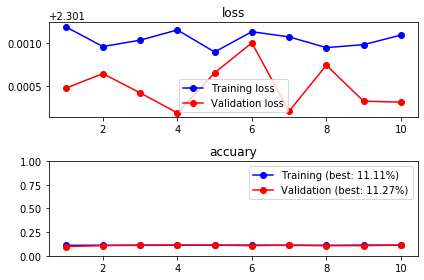

In [41]:

fig, axes = plt.subplots(2,1)
epochs = range(1, len(loss_values) + 1)

# 损失
axes[0].plot(epochs, loss_values, 'b-o', label='Training loss')
axes[0].plot(epochs, val_loss_values, 'r-o', label='Validation loss')
axes[0].legend()
axes[0].set_title('loss')

# 准确度
axes[1].plot(epochs, acc_values, 'b-o', label=f'Training (best: {train_best_acc})')
axes[1].plot(epochs, val_acc_values, 'r-o', label=f'Validation (best: {val_best_acc})')
axes[1].legend()
axes[1].set_title('accuary')
axes[1].set_ylim([0, 1])

plt.tight_layout()
plt.show()

# 测试

In [42]:
test_loss, test_acc = network.evaluate(test_vectors_norm, test_one_hots)

10000/10000 [==============================] - 0s 46us/step
